In [ ]:
pip install pandas


In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=50be7b7d87483e06487f894c8825ab12ac0987df00ea6f2a9d8a85eacb4a6cb2
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import datetime

In [ ]:
#import dataset
df = pd.read_excel('/content/dataskripsi.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,InvoiceDate,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,Product,PRODUCT_CATEGORY,Quantity,oldCUSTID,CustomerID,SUBDISTID,PROVINSI
0,536365,2023-07-07 09:58:00,SAMARINDA,10001,8992753282401,85123A,SMITH Hair Clay Clayton 55gr,HC,1.0,3012815,17850.0,130113,KALIMANTAN TIMUR
1,536365,2023-07-23 10:58:00,SAMARINDA,20020,8999909192034,71053,SMITH Hair Styling & Volumizing Powder Ocean D...,HS & BH,2.0,3012909,17850.0,130113,KALIMANTAN TIMUR
2,536365,2023-07-25 11:58:00,YOGYAKARTA,20021,8999909007147,84406B,SMITH Pomade Oil Based Bold Hold 85gr,BH,3.0,1921270,17850.0,190105,JAWA TENGAH
3,536365,2023-07-09 12:58:00,SAMARINDA,20018,8999909172234,84029G,SMITH Hair Styling & Volumizing Powder Ocean D...,HS & POD,3.0,3012739,17850.0,130113,KALIMANTAN TIMUR
4,536365,2023-07-03 13:58:00,YOGYAKARTA,20019,8999909005860,84029E,SMITH Hair Clay Clayton 55gr,HC,3.0,1921012,17850.0,190105,JAWA TENGAH


In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            1699 non-null   object        
 1   InvoiceDate          1699 non-null   datetime64[ns]
 2   BRANCHNAME_SPLR      1699 non-null   object        
 3   warehouseProductsID  1699 non-null   object        
 4   BARCODEID            1699 non-null   int64         
 5   StockCode            1699 non-null   object        
 6   Product              1699 non-null   object        
 7   PRODUCT_CATEGORY     1686 non-null   object        
 8   Quantity             1685 non-null   float64       
 9   oldCUSTID            1699 non-null   int64         
 10  CustomerID           1442 non-null   float64       
 11  SUBDISTID            1699 non-null   int64         
 12  PROVINSI             1656 non-null   object        
dtypes: datetim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Unique Items: ', df['Product'].nunique())

Unique Items:  18


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Product'].nunique())
print( '\n', df['Product'].unique())

Unique Items:  18

 ['SMITH Hair Clay Clayton 55gr'
 'SMITH Hair Styling & Volumizing Powder Ocean Dust 11gr'
 'SMITH Pomade Oil Based Bold Hold 85gr'
 'SMITH Pomade Oil Based Premium Medium 85gr'
 'Smith Active Dandruff Buster Shampoo 235ml'
 'BUBBLEWRAP TAMBAHAN AGAR PAKET LEBIH AMAN'
 'SMITH Hairwax Black Jack 85gr' 'SMITH Pomade Oil Based Fine Shine 85gr'
 'SMITH Pomade Water Based Dapper Spatter 85gr'
 'Hair Clay & Hairwax Bundling (SMITH Clayton & SMITH Black Jack)'
 'Special Bundling Ocean Dust + Clayton'
 'SMITH x SONAR : Boldness Bundling Package (Premium Medium+DATE U 50ml)'
 'SMITH Refresh Wipes'
 'Smith Active Bundling: (Shampoo, Face Cleanser & Body Cleanser'
 'SMITH Pomade water based Dashing Slick 85gr'
 'Special Bundling Ocean Dust +Dapper Spatter'
 'Smith Active Deep Face Cleanser Facial Wash 85ml'
 'Smith Active Deep Body Cleanser Soap 235ml']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Product'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

SMITH Hair Styling & Volumizing Powder Ocean Dust 11gr                    573
SMITH Hair Clay Clayton 55gr                                              328
SMITH Pomade Oil Based Premium Medium 85gr                                212
SMITH Hairwax Black Jack 85gr                                             155
SMITH Pomade Oil Based Bold Hold 85gr                                     144
SMITH Pomade Water Based Dapper Spatter 85gr                               96
SMITH Pomade water based Dashing Slick 85gr                                82
SMITH Pomade Oil Based Fine Shine 85gr                                     44
Hair Clay & Hairwax Bundling (SMITH Clayton & SMITH Black Jack)            17
Smith Active Dandruff Buster Shampoo 235ml                                 14
SMITH Refresh Wipes                                                         9
Smith Active Deep Face Cleanser Facial Wash 85ml                            5
BUBBLEWRAP TAMBAHAN AGAR PAKET LEBIH AMAN    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["month"] = df['InvoiceDate'].dt.month
df["day"] = df['InvoiceDate'].dt.weekday
df["hour"] = df['InvoiceDate'].dt.hour
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,InvoiceDate,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,Product,PRODUCT_CATEGORY,Quantity,oldCUSTID,CustomerID,SUBDISTID,PROVINSI,month,day,hour
0,536365,2023-07-07 09:58:00,SAMARINDA,10001,8992753282401,85123A,SMITH Hair Clay Clayton 55gr,HC,1.0,3012815,17850.0,130113,KALIMANTAN TIMUR,7,4,9
1,536365,2023-07-23 10:58:00,SAMARINDA,20020,8999909192034,71053,SMITH Hair Styling & Volumizing Powder Ocean D...,HS & BH,2.0,3012909,17850.0,130113,KALIMANTAN TIMUR,7,6,10
2,536365,2023-07-25 11:58:00,YOGYAKARTA,20021,8999909007147,84406B,SMITH Pomade Oil Based Bold Hold 85gr,BH,3.0,1921270,17850.0,190105,JAWA TENGAH,7,1,11
3,536365,2023-07-09 12:58:00,SAMARINDA,20018,8999909172234,84029G,SMITH Hair Styling & Volumizing Powder Ocean D...,HS & POD,3.0,3012739,17850.0,130113,KALIMANTAN TIMUR,7,6,12
4,536365,2023-07-03 13:58:00,YOGYAKARTA,20019,8999909005860,84029E,SMITH Hair Clay Clayton 55gr,HC,3.0,1921012,17850.0,190105,JAWA TENGAH,7,0,13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


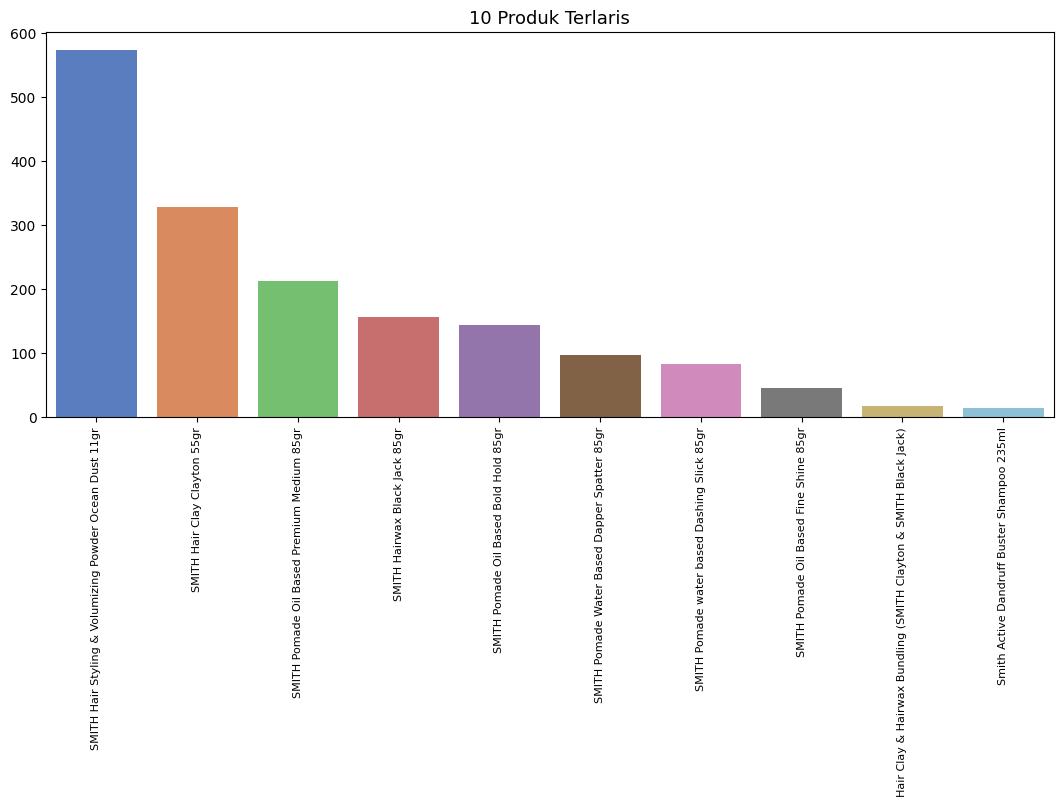

In [ ]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = df["Product"].value_counts()[:10].index,
            y = df["Product"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 8, rotation = 90)
plt.title('10 Produk Terlaris', size = 13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari Juli sampai Agustus')

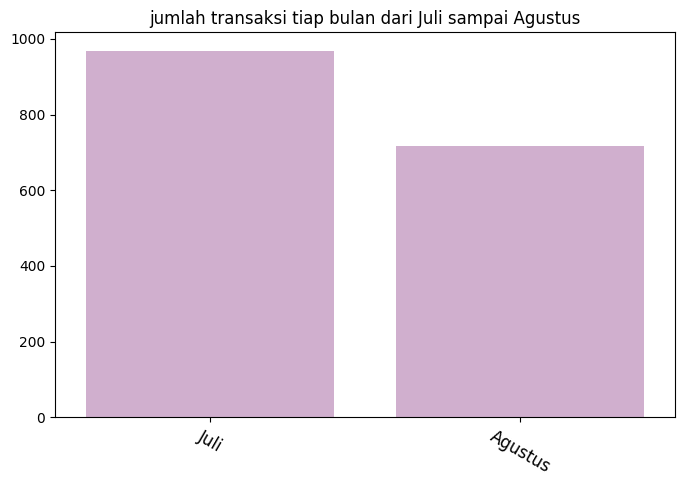

In [ ]:
#transaksi perbulan

df_perbulan = df.groupby('month')['Quantity'].count()
df_perbulan = pd.concat([df_perbulan.iloc[2:], df_perbulan.iloc[:2]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ['Juli', 'Agustus'],
    y = df_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari Juli sampai Agustus")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'jumlah transaksi setiap harinya')

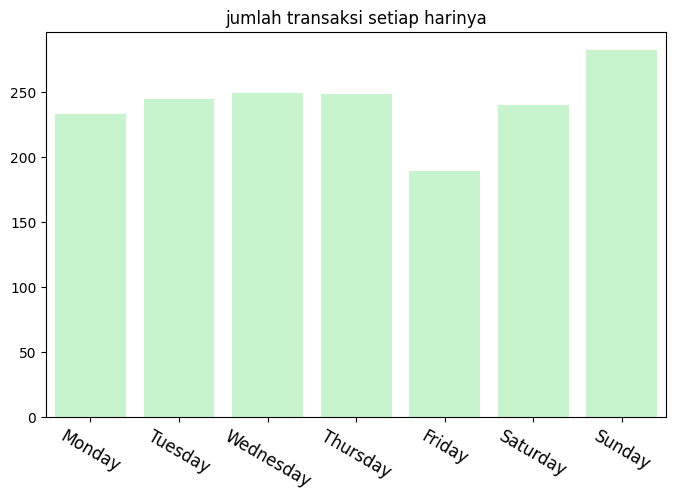

In [ ]:
#transaksi perhari

df_perday = df.groupby('day')['Quantity'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = df_perday.values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi setiap harinya")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


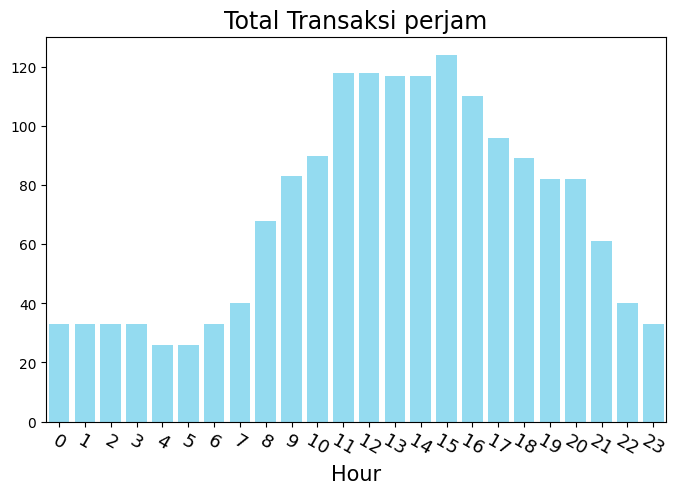

In [ ]:
#transaksi perjam

df_perhour = df.groupby('hour')['Quantity'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = df_perhour.index,
    y = df_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi perjam", size = 17)
plt.xticks(size = 13)
plt.show()

In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Product'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

SMITH Hair Styling & Volumizing Powder Ocean Dust 11gr                    573
SMITH Hair Clay Clayton 55gr                                              328
SMITH Pomade Oil Based Premium Medium 85gr                                212
SMITH Hairwax Black Jack 85gr                                             155
SMITH Pomade Oil Based Bold Hold 85gr                                     144
SMITH Pomade Water Based Dapper Spatter 85gr                               96
SMITH Pomade water based Dashing Slick 85gr                                82
SMITH Pomade Oil Based Fine Shine 85gr                                     44
Hair Clay & Hairwax Bundling (SMITH Clayton & SMITH Black Jack)            17
Smith Active Dandruff Buster Shampoo 235ml                                 14
SMITH Refresh Wipes                                                         9
Smith Active Deep Face Cleanser Facial Wash 85ml                            5
BUBBLEWRAP TAMBAHAN AGAR PAKET LEBIH AMAN    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# mengubah kolom periode menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Product'] = df['Product'].str.strip()
df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.strip()

df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~(df['InvoiceNo'].str[0] == 'C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket = (df[df['PROVINSI'] =="JAWA BARAT"].groupby(['InvoiceNo', 'Product']) ['Quantity'].count()\
          .unstack().reset_index().fillna(0)\
          .set_index('InvoiceNo'))
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product,Hair Clay & Hairwax Bundling (SMITH Clayton & SMITH Black Jack),SMITH Hair Clay Clayton 55gr,SMITH Hair Styling & Volumizing Powder Ocean Dust 11gr,SMITH Hairwax Black Jack 85gr,SMITH Pomade Oil Based Bold Hold 85gr,SMITH Pomade Oil Based Fine Shine 85gr,SMITH Pomade Oil Based Premium Medium 85gr,SMITH Pomade Water Based Dapper Spatter 85gr,SMITH Pomade water based Dashing Slick 85gr,SMITH Refresh Wipes,Smith Active Dandruff Buster Shampoo 235ml
InvoiceNo,,,,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536382,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket.iloc[:,[0,1,2,3,4,5,6,7]].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product,Hair Clay & Hairwax Bundling (SMITH Clayton & SMITH Black Jack),SMITH Hair Clay Clayton 55gr,SMITH Hair Styling & Volumizing Powder Ocean Dust 11gr,SMITH Hairwax Black Jack 85gr,SMITH Pomade Oil Based Bold Hold 85gr,SMITH Pomade Oil Based Fine Shine 85gr,SMITH Pomade Oil Based Premium Medium 85gr,SMITH Pomade Water Based Dapper Spatter 85gr
InvoiceNo,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
536367,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
536382,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1
basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product,Hair Clay & Hairwax Bundling (SMITH Clayton & SMITH Black Jack),SMITH Hair Clay Clayton 55gr,SMITH Hair Styling & Volumizing Powder Ocean Dust 11gr,SMITH Hairwax Black Jack 85gr,SMITH Pomade Oil Based Bold Hold 85gr,SMITH Pomade Oil Based Fine Shine 85gr,SMITH Pomade Oil Based Premium Medium 85gr,SMITH Pomade Water Based Dapper Spatter 85gr,SMITH Pomade water based Dashing Slick 85gr,SMITH Refresh Wipes,Smith Active Dandruff Buster Shampoo 235ml
InvoiceNo,,,,,,,,,,,
536366,0,0,0,0,0,0,1,0,0,0,0
536367,0,0,1,0,0,0,0,0,0,0,0
536370,0,1,0,0,0,0,0,0,0,0,0
536375,0,1,0,1,0,0,0,0,0,0,0
536382,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.500000,(SMITH Hair Clay Clayton 55gr)
1,0.518519,(SMITH Hair Styling & Volumizing Powder Ocean ...
2,0.203704,(SMITH Hairwax Black Jack 85gr)
3,0.277778,(SMITH Pomade Oil Based Bold Hold 85gr)
4,0.388889,(SMITH Pomade Oil Based Premium Medium 85gr)
5,0.203704,(SMITH Pomade Water Based Dapper Spatter 85gr)
6,0.111111,(SMITH Pomade water based Dashing Slick 85gr)
7,0.314815,"(SMITH Hair Clay Clayton 55gr, SMITH Hair Styl..."
8,0.148148,"(SMITH Hair Clay Clayton 55gr, SMITH Hairwax B..."
9,0.111111,"(SMITH Hair Clay Clayton 55gr, SMITH Pomade Oi..."


In [ ]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SMITH Hair Clay Clayton 55gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.500000,0.518519,0.314815,0.629630,1.214286,0.055556,1.300000,0.352941
1,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Hair Clay Clayton 55gr),0.518519,0.500000,0.314815,0.607143,1.214286,0.055556,1.272727,0.366516
2,(SMITH Hair Clay Clayton 55gr),(SMITH Hairwax Black Jack 85gr),0.500000,0.203704,0.148148,0.296296,1.454545,0.046296,1.131579,0.625000
3,(SMITH Hairwax Black Jack 85gr),(SMITH Hair Clay Clayton 55gr),0.203704,0.500000,0.148148,0.727273,1.454545,0.046296,1.833333,0.392442
4,(SMITH Hairwax Black Jack 85gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.203704,0.518519,0.129630,0.636364,1.227273,0.024005,1.324074,0.232558
5,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Hairwax Black Jack 85gr),0.518519,0.203704,0.129630,0.250000,1.227273,0.024005,1.061728,0.384615
6,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Pomade Oil Based Premium Medium 85gr),0.518519,0.388889,0.203704,0.392857,1.010204,0.002058,1.006536,0.020979
7,(SMITH Pomade Oil Based Premium Medium 85gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.388889,0.518519,0.203704,0.523810,1.010204,0.002058,1.011111,0.016529
8,(SMITH Pomade Water Based Dapper Spatter 85gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.203704,0.518519,0.111111,0.545455,1.051948,0.005487,1.059259,0.062016
9,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Pomade Water Based Dapper Spatter 85gr),0.518519,0.203704,0.111111,0.214286,1.051948,0.005487,1.013468,0.102564


In [ ]:
result1 = rules1[(rules1['lift'] >= 1) &
                 (rules1['confidence'] >=0.5)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,"(SMITH Hair Clay Clayton 55gr, SMITH Pomade Oi...",(SMITH Hair Styling & Volumizing Powder Ocean ...,0.111111,0.518519,0.111111,1.000000,1.928571,0.053498,inf,0.541667
19,"(SMITH Hair Clay Clayton 55gr, SMITH Pomade Oi...",(SMITH Hair Styling & Volumizing Powder Ocean ...,0.148148,0.518519,0.148148,1.000000,1.928571,0.071331,inf,0.565217
14,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Hair Clay Clayton 55gr),0.129630,0.500000,0.111111,0.857143,1.714286,0.046296,3.500000,0.478723
11,(SMITH Pomade Oil Based Bold Hold 85gr),(SMITH Pomade Oil Based Premium Medium 85gr),0.277778,0.388889,0.203704,0.733333,1.885714,0.095679,2.291667,0.650350
3,(SMITH Hairwax Black Jack 85gr),(SMITH Hair Clay Clayton 55gr),0.203704,0.500000,0.148148,0.727273,1.454545,0.046296,1.833333,0.392442
20,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Hair Clay Clayton 55gr),0.203704,0.500000,0.148148,0.727273,1.454545,0.046296,1.833333,0.392442
4,(SMITH Hairwax Black Jack 85gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.203704,0.518519,0.129630,0.636364,1.227273,0.024005,1.324074,0.232558
0,(SMITH Hair Clay Clayton 55gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.500000,0.518519,0.314815,0.629630,1.214286,0.055556,1.300000,0.352941
1,(SMITH Hair Styling & Volumizing Powder Ocean ...,(SMITH Hair Clay Clayton 55gr),0.518519,0.500000,0.314815,0.607143,1.214286,0.055556,1.272727,0.366516
8,(SMITH Pomade Water Based Dapper Spatter 85gr),(SMITH Hair Styling & Volumizing Powder Ocean ...,0.203704,0.518519,0.111111,0.545455,1.051948,0.005487,1.059259,0.062016


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
_df_0['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['consequent support'].plot(kind='hist', bins=20, title='consequent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='consequent support', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='antecedent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='consequent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='confidence', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
